In [76]:
import zipfile
import numpy as np
zip_ref = zipfile.ZipFile("CSTR data files.zip", 'r')
zip_ref.extractall("/content/sample_data")
zip_ref.close()

In [77]:
import scipy.io
Tr_attack = scipy.io.loadmat('/content/sample_data/CSTR_train_attack.mat')
Tr_noise = scipy.io.loadmat('/content/sample_data/CSTR_train_noise.mat')
Tr_normal = scipy.io.loadmat('/content/sample_data/CSTR_train_normal.mat')
Te_attack = scipy.io.loadmat('/content/sample_data/CSTR_test_attack.mat')
Te_noise = scipy.io.loadmat('/content/sample_data/CSTR_test_noise.mat')
Te_normal = scipy.io.loadmat('/content/sample_data/CSTR_test_normal.mat')


In [78]:
Train_attack = Tr_attack['CSTR_train_attack']
Train_noise = Tr_noise['CSTR_train_noise']
Train_Normal = Tr_normal['CSTR_train_normal']
Test_attack = Te_attack['CSTR_test_attack']
Test_noise = Te_noise['CSTR_test_noise']
Test_Normal = Te_normal['CSTR_test_normal']

In [79]:
print("The size of the training dataset for Attack",Train_attack.shape)
print("The size of the training dataset for Noise",Train_noise.shape)
print("The size of the training dataset for Normal",Train_Normal.shape)
print("The size of the testing dataset for Attack",Test_attack.shape)
print("The size of the testing dataset for Noise",Test_noise.shape)
print("The size of the testing dataset for Normal",Test_Normal.shape)


The size of the training dataset for Attack (694, 201)
The size of the training dataset for Noise (694, 201)
The size of the training dataset for Normal (694, 201)
The size of the testing dataset for Attack (15, 201)
The size of the testing dataset for Noise (15, 201)
The size of the testing dataset for Normal (15, 201)


In [80]:
Combined_training = []
for x in Train_attack[:,:-1]:
  Combined_training.append(x)
for x in Train_noise[:,:-1]:
  Combined_training.append(x)
for x in Train_Normal[:,:-1]:
  Combined_training.append(x)

In [81]:
Combined_training =np.array(Combined_training)
print("The combined training set",Combined_training.shape)

The combined training set (2082, 200)


In [82]:
Training_target = []
for x in Train_attack[:,-1]:
  Training_target.append(x)
for x in Train_noise[:,-1]:
  Training_target.append(x)
for x in Train_Normal[:,-1]:
  Training_target.append(x)

In [83]:
Training_target = np.array(Training_target)
print("The combined target training set",Training_target.shape)

The combined target training set (2082,)


In [84]:
Combined_testing = []
for x in Test_attack[:,:-1]:
  Combined_testing.append(x)
for x in Test_noise[:,:-1]:
  Combined_testing.append(x)
for x in Test_Normal[:,:-1]:
  Combined_testing.append(x)

In [85]:
Combined_testing = np.array(Combined_testing)
print("The combined target testing set",Combined_testing.shape)

The combined target testing set (45, 200)


In [86]:
Target_testing = []
for x in Test_attack[:,-1]:
  Target_testing.append(x)
for x in Test_noise[:,-1]:
  Target_testing.append(x)
for x in Test_Normal[:,-1]:
  Target_testing.append(x)

In [87]:
Target_testing = np.array(Target_testing)
print("The combined target testing set",Target_testing.shape)

The combined target testing set (45,)


In [88]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)
target_total_train = enc.fit_transform(Training_target.reshape(-1,1))
target_total_train = np.array(target_total_train)
target_total_test = enc.fit_transform(Target_testing.reshape(-1,1))
target_total_test = np.array(target_total_test)
print("Total Testing size: ",target_total_test.shape)
print("Total Training size: ",target_total_train.shape)

Total Testing size:  (45, 3)
Total Training size:  (2082, 3)


In [89]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[200,]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

In [90]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 200)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 25)                1275      
                                                                 
 dense_19 (Dense)            (None, 3)                 78        
                                                                 
Total params: 26503 (103.53 KB)
Trainable params: 26503 (103.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
from keras import losses

model.compile(loss="categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=True),
metrics=["accuracy"])
hist = model.fit(Combined_training, target_total_train,epochs=1000, steps_per_epoch=2,validation_steps=2,validation_data = (Combined_testing,target_total_test))


Epoch 1/1000
2/2 [==============================] - 3s 518ms/step - loss: 53.1120 - accuracy: 0.3391 - val_loss: 55.4978 - val_accuracy: 0.3333
Epoch 2/1000
2/2 [==============================] - 0s 88ms/step - loss: 52.1112 - accuracy: 0.3386 - val_loss: 54.1955 - val_accuracy: 0.3333
Epoch 3/1000
2/2 [==============================] - 0s 107ms/step - loss: 51.1009 - accuracy: 0.3386 - val_loss: 52.8996 - val_accuracy: 0.3333
Epoch 4/1000
2/2 [==============================] - 0s 92ms/step - loss: 50.1123 - accuracy: 0.3386 - val_loss: 51.6050 - val_accuracy: 0.3333
Epoch 5/1000
2/2 [==============================] - 0s 108ms/step - loss: 49.1208 - accuracy: 0.3391 - val_loss: 50.3218 - val_accuracy: 0.3333
Epoch 6/1000
2/2 [==============================] - 0s 82ms/step - loss: 48.1450 - accuracy: 0.3396 - val_loss: 49.0463 - val_accuracy: 0.3333
Epoch 7/1000
2/2 [==============================] - 0s 97ms/step - loss: 47.1624 - accuracy: 0.3396 - val_loss: 47.7795 - val_accuracy: 0.3

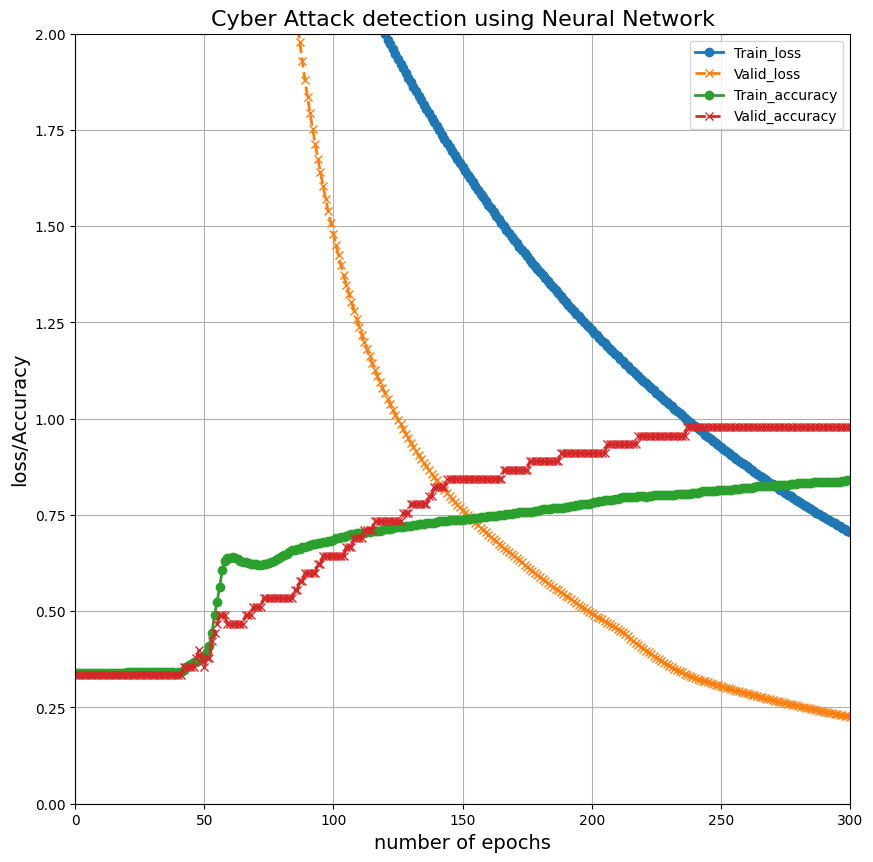

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(hist.history['loss'],label ="Train_loss",linestyle='solid', linewidth = 2,marker='o', markersize=6)
plt.plot(hist.history['val_loss'],label ="Valid_loss",linestyle='--', linewidth = 2,marker='x', markersize=6)
plt.plot(hist.history['accuracy'],label ="Train_accuracy",linestyle='solid', linewidth = 2,marker='o', markersize=6)
plt.plot(hist.history['val_accuracy'],label ="Valid_accuracy",linestyle='--', linewidth = 2,marker='x', markersize=6)
plt.gca().set_xlim(0, 300)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.xlabel('number of epochs', fontsize=14)
plt.ylabel('loss/Accuracy', fontsize=14)
plt.title('Cyber Attack detection using Neural Network',fontsize=16)
plt.legend()
plt.grid(True)

In [93]:
# Evaluating the model on the training and testing set
score = model.evaluate(Combined_training, target_total_train, verbose=0)
print("Training Accuracy: ", score[1])
score = model.evaluate(Combined_testing, target_total_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9769452214241028
Testing Accuracy:  0.9777777791023254
